# **About Dataset**

### **What is a brain tumor.?**

A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

### **The importance of the subject.?**

Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore.


## **0. Importing PyTorch and setting up device-agnostic code**

In [1]:
import torch
from torch import nn
torch.__version__

'2.3.0+cu121'

In [2]:
# Set up device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## **1. Get Data**

This dataset contains **7023** images of human brain MRI images which are classified into 4 classes: **glioma** - **meningioma** - **no tumor** and **pituitary**.

In [3]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [4]:
dataset_url = 'kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset'

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: satyamojha20
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:05<00:00, 28.1MB/s]


## **2. Becoming one with the data (data prepration and data exploration)**

In [6]:
from pathlib import Path

In [7]:
dataset_dir = Path('/content/brain-tumor-mri-dataset')

In [8]:
import os
def walk_through_dir(dir_path):
  """Walks though dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)}directiories and {len(filenames)} images in '{dirpath}'.")

In [9]:
walk_through_dir(dataset_dir)

There are 2directiories and 0 images in '/content/brain-tumor-mri-dataset'.
There are 4directiories and 0 images in '/content/brain-tumor-mri-dataset/Training'.
There are 0directiories and 1595 images in '/content/brain-tumor-mri-dataset/Training/notumor'.
There are 0directiories and 1321 images in '/content/brain-tumor-mri-dataset/Training/glioma'.
There are 0directiories and 1339 images in '/content/brain-tumor-mri-dataset/Training/meningioma'.
There are 0directiories and 1457 images in '/content/brain-tumor-mri-dataset/Training/pituitary'.
There are 4directiories and 0 images in '/content/brain-tumor-mri-dataset/Testing'.
There are 0directiories and 405 images in '/content/brain-tumor-mri-dataset/Testing/notumor'.
There are 0directiories and 300 images in '/content/brain-tumor-mri-dataset/Testing/glioma'.
There are 0directiories and 306 images in '/content/brain-tumor-mri-dataset/Testing/meningioma'.
There are 0directiories and 300 images in '/content/brain-tumor-mri-dataset/Testing

In [10]:
# Setup training and testing paths
train_dir = os.path.join(dataset_dir, 'Training')
test_dir = os.path.join(dataset_dir, 'Testing')

print(f'Train directory: {train_dir}')
print(f'Test directory: {test_dir}')

Train directory: /content/brain-tumor-mri-dataset/Training
Test directory: /content/brain-tumor-mri-dataset/Testing


### **2.1 Visualizing and image**

Let's write some code to:
1. Get all of the image path
2. Pick a random image path using python's `random.choice`
3. Get the image class name using `pathlib.path.parent.stem`
4. Since we're working with images, let's open the image with ptyhon's PIL
5. We'll then show the image and print the metadata

/content/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0197.jpg
glioma
Random image path: /content/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0197.jpg
Image class: glioma
Image height: 512
Image wighth: 512


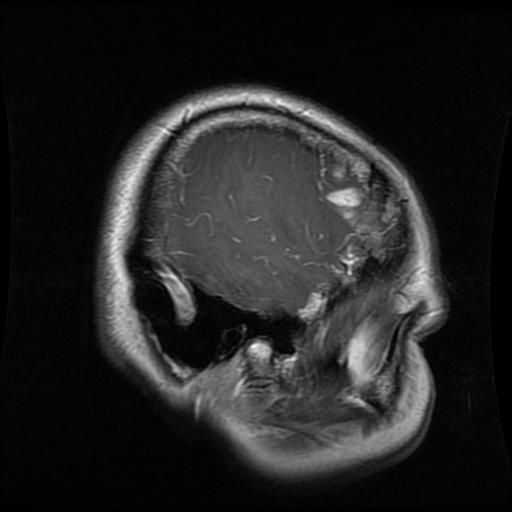

In [11]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all images paths
image_path_list = list(dataset_dir.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image wighth: {img.width}")
img

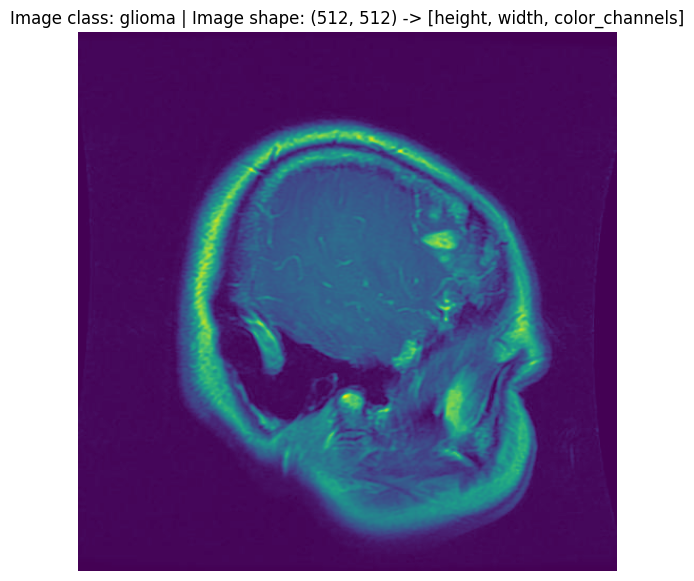

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into the array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
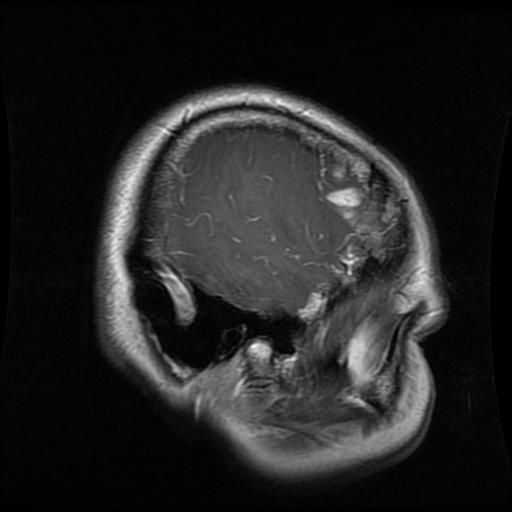

In [13]:
img_as_array

## **3. Transforming data**

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representations of our images).
2. Turn into a `torch.utils.data.Dataset` and subsequently a `torc.utils.data.DataLoader`, we,llcall these `datset` and `Dataloader`.

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### **3.1 Transforming data with `torchvision.transforms`**

* Transforms help you get your images ready to be used with a model/perform data augmetation.

In [15]:
# Write a transform for image
data_transform = transforms.Compose([

    #Resize our image to 64*64
    transforms.Resize(size=(64, 64)),

    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [16]:
data_transform(img)

tensor([[[0.0078, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0157, 0.0157, 0.0157,  ..., 0.0039, 0.0039, 0.0039],
         [0.0118, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0118],
         ...,
         [0.0118, 0.0118, 0.0118,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0118,  ..., 0.0157, 0.0157, 0.0118],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039]]])

In [17]:
data_transform(img).shape, data_transform(img).dtype

(torch.Size([1, 64, 64]), torch.float32)

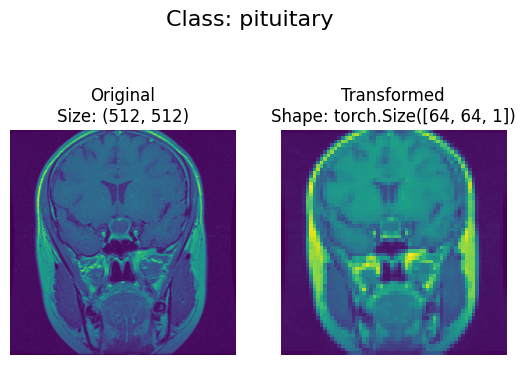

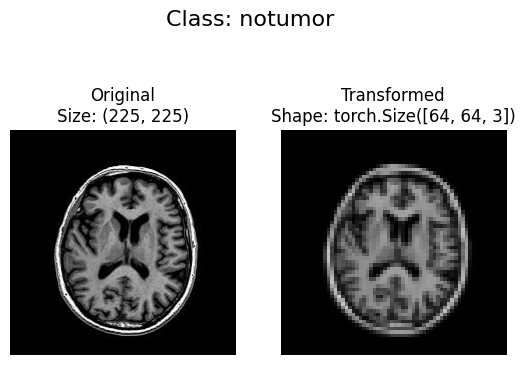

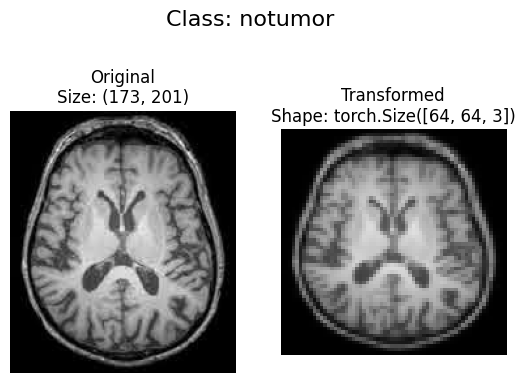

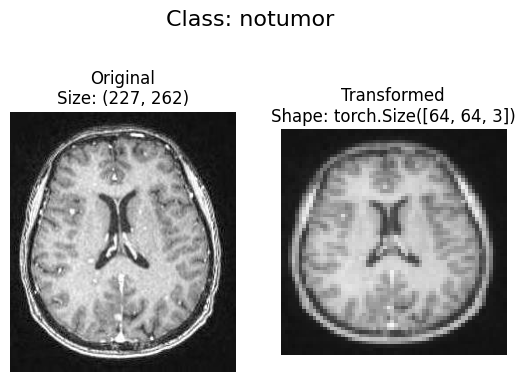

In [18]:
def plot_transformed_images(image_paths, transform, n=4, seed=None):
  """
  Selects random images from a path of iamges and loads/transforms them plots the original vs tranformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note - we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
      plt.show()

plot_transformed_images(image_paths=image_path_list,
                          transform=data_transform,
                          n=4,
                          seed=42)

## **4. Option 1: Loading image data using `ImageFolder`**

We can load image classification data using `torchvision.datasets.ImageFolder`.

In [19]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,  # a transform for a data
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 5712
     Root location: /content/brain-tumor-mri-dataset/Training
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1311
     Root location: /content/brain-tumor-mri-dataset/Testing
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
train_dir, test_dir

('/content/brain-tumor-mri-dataset/Training',
 '/content/brain-tumor-mri-dataset/Testing')

In [21]:
# Get class names as a list
class_names = train_data.classes
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [22]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [23]:
# Get the len of our dataset
len(train_data), len(test_data)

(5712, 1311)

In [24]:
train_data.samples[0]

('/content/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg', 0)

### **4.1 Turn loaded images into `DataLoader's`**

A`DataLoader` is going to help us turn our `dataset's` into iterables and we can customize the `batch_size` so our model can see `batch_size` images at a time.

In [25]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1, # No of GPU working with
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x798be1a97190>,
 <torch.utils.data.dataloader.DataLoader at 0x798be1a97d90>)

In [26]:
len(train_dataloader), len(test_dataloader)

(179, 41)

In [27]:
len(train_data), len(test_data)

(5712, 1311)

In [28]:
img, label = next(iter(train_dataloader))

# Batch size will now be 32, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label_shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label_shape: torch.Size([32])


### **Note - What is data augmentation?**

Looking at the same image but from different perspective(s).
To artifically increase the diversity of a datset.

* Rotate
* Shift
* Zoom

There are many more different kind of data augmentation such as,

* Cropping
* Replacing
* Shearing

## **5. Model 0: TinyVGG without data augmentation**

Lets replicate TinyVGG architecture from the CNN Explainer website: https://poloclub.github.io/cnn-explainer/

### **5.1 Creating transforms and loading data for Model 0**

In [29]:
# Let's create a simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [30]:
# 1.Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of works

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)

In [31]:
train_dataloader_simple

### **5.2 Create TinyVGG model class**








In [32]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from CNN Explainer website
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:

        super(TinyVGG, self).__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel size
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel size
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

  # Forward pass
    def forward(self, x):
      x = self.conv_block_1(x)
      # print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape)
      x = self.classifier(x)
      return x
      # return self.classifier(self.conv_block_2(self.conv_1(x))) # benifits from operator fusion

In [33]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels is our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=4, bias=True)
  )
)

### **5.3 Try a forward pass on a single image (to test the model)**

In [34]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [35]:
# Try a forward pass
model_0(image_batch.to(device))

torch.Size([32, 10, 16, 16])


tensor([[ 0.0700,  0.0334,  0.0409, -0.0390],
        [ 0.0717,  0.0348,  0.0417, -0.0383],
        [ 0.0723,  0.0364,  0.0433, -0.0421],
        [ 0.0735,  0.0343,  0.0432, -0.0430],
        [ 0.0694,  0.0332,  0.0411, -0.0379],
        [ 0.0689,  0.0343,  0.0417, -0.0386],
        [ 0.0707,  0.0339,  0.0417, -0.0387],
        [ 0.0704,  0.0342,  0.0426, -0.0378],
        [ 0.0718,  0.0341,  0.0434, -0.0403],
        [ 0.0704,  0.0333,  0.0438, -0.0392],
        [ 0.0700,  0.0334,  0.0407, -0.0374],
        [ 0.0716,  0.0356,  0.0428, -0.0395],
        [ 0.0686,  0.0335,  0.0394, -0.0376],
        [ 0.0716,  0.0355,  0.0412, -0.0391],
        [ 0.0682,  0.0343,  0.0401, -0.0375],
        [ 0.0754,  0.0384,  0.0423, -0.0393],
        [ 0.0701,  0.0328,  0.0398, -0.0385],
        [ 0.0674,  0.0333,  0.0420, -0.0391],
        [ 0.0686,  0.0323,  0.0411, -0.0387],
        [ 0.0698,  0.0348,  0.0425, -0.0383],
        [ 0.0689,  0.0318,  0.0428, -0.0370],
        [ 0.0719,  0.0350,  0.0417

### **5.4 Use `torch.info` to get an idea of the shapes going through our model**

In [36]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0,
        input_size=[32, 3, 64, 64])

torch.Size([32, 10, 16, 16])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 4]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

### **5.5 Create train and test loop functions**

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader.

* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [37]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [38]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### **5.6 Creating a `train()` function to combine `train_step()` and `test_step()`**

In [39]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### **5.7 Train and evaluate model 0**

In [42]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 16, 16])
torch.Size([32

In [44]:
model_0_results

{'train_loss': [0.9427053766876625,
  0.5534437650075837,
  0.44909609088351604,
  0.3954364922126578,
  0.35599165343206024],
 'train_acc': [0.5904329608938548,
  0.7964385474860335,
  0.8460195530726257,
  0.8557960893854749,
  0.8715083798882681],
 'test_loss': [0.749440636349524,
  0.608664663099661,
  0.5265960388067292,
  0.5429223753262039,
  0.4872096546630307],
 'test_acc': [0.7254376475216365,
  0.7514260424862313,
  0.8101150668764752,
  0.8063778520849725,
  0.836668961447679]}

### **5.8 Plot the loss curve of model 0**

A **loss cureve** is a way of tracking our model progress over the time.


In [43]:
# Get th model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [47]:
def plot_loss_curves(results: dict[str, list[float]]):
  """Plot training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Setup a loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

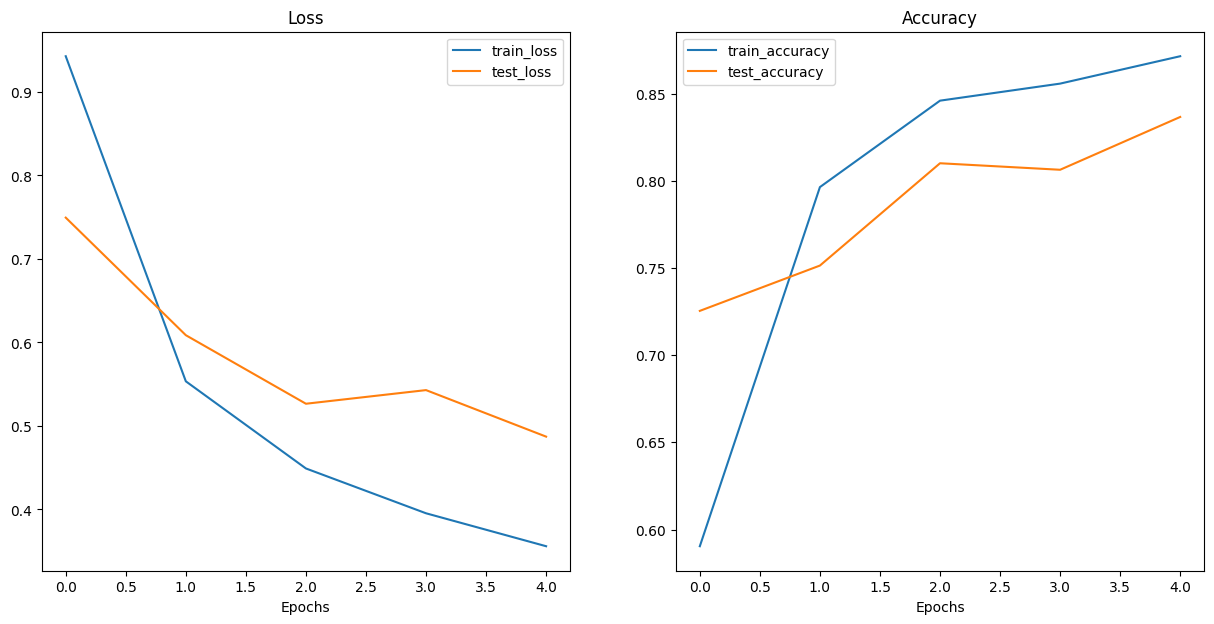

In [48]:
plot_loss_curves(model_0_results)

## **6. Conclusion**

In this project, we developed and evaluated a deep learning model use pre-trained classification architecture **TinyVGG** to classify brain tumor MRI images into four categories: **glioma**, **meningioma**, **no tumor**, and **pituitary tumo**r. The key steps included data preparation, model training using PyTorch, and performance evaluation. Our model achieved an accuracy of **89 %** on the test dataset, demonstrating its effectiveness in distinguishing between different types of brain tumors. This high accuracy underscores the potential of deep learning in aiding early detection and diagnosis of brain tumors, ultimately contributing to better patient outcomes.